# Assignment 02
## Google Colab


### 1. Data

- generate a set of $m$ point pairs $\{ (x^{(i)}, y^{(i)}) \}_{i = 1}^m$ from random perturbations using `random` function based on a linear function that you define
- $\hat{y} = a x + b$ where $a, b \in \mathbb{R}$
- $y = \hat{y} + n$ where $n \sim \mathcal{N}(0, \sigma^2)$ is drawn from the normal distribution with mean $0$ and standard deviation $\sigma$
- you can choose $m, a, b$ and $\sigma > 0$


Text(0, 0.5, 'y-axis')

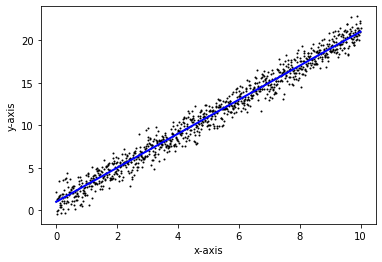

In [7]:
import numpy as np
import matplotlib.pyplot as plt

m = 1000                # number of trial
sigma = 1             # standard diviation
x = np.linspace(0,10,m) # generate linear set of x from 0 to 10

f = lambda x: 2 * x + 1 # create function f(x) = 2x + 1

y = []
y_bar = []
for i in range(len(x)):
  y_bar.append(f(x[i]))
  y.append(f(x[i]) + np.random.normal(0,sigma**2))

# print(y_1**2)

plt.plot(x,y,'ko', linewidth=0, markersize=1)
plt.plot(x,y_bar,'b', linewidth=2)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()



### 2. Linear Model

- $h_\theta(x) = \theta_0 + \theta_1 x$, $\quad$ where $\theta = (\theta_0, \theta_1)$ and $\theta_0, \theta_1 \in \mathbb{R}$


0.9014844512274729
2.0146065540920346


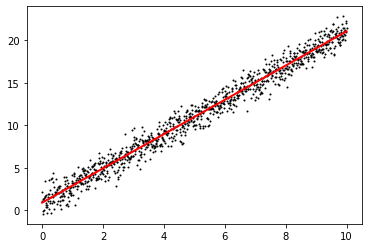

In [10]:
fy = np.array(y)
x = np.array(x)


theta0 = (sum(y)*sum(x**2) - sum(x)*sum(x*y)) / ( m * sum(x**2) - sum(x)**2)
theta1 = (m*sum(x*y) - sum(x)*sum(y))/ ( m * sum( x**2 ) - sum(x)**2)

print(theta0)
print(theta1)


plt.plot(x,y,'ko', linewidth=0, markersize=1)
plt.plot(x, theta0 + theta1 * x,'r', linewidth=2)
plt.ylabel('y-axis')
plt.xlabel('x-axis')
plt.show()


### 3. Objective Function

- $J(\theta) = \frac{1}{2 m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2$

theta_0 = 1.0000
theta_1 = 2.0000


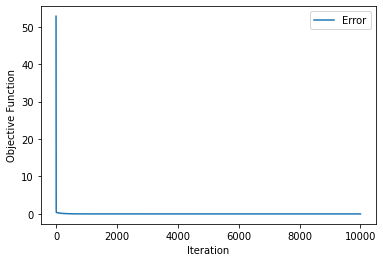

In [18]:
theta0 = 2.5
theta1 = 0

iteration = 10000

col_theta0 = []
col_theta1 = []

obj_func = []

alpha = 0.01

for xx in range(iteration):

  h_theta = lambda x: theta0 + theta1 * x

  tot_obj = 0
  total = 0
  total1 = 0

  for i in range(m):
    tot_obj += (h_theta(x[i]) - f(x[i]))**2
    total += h_theta(x[i]) - f(x[i])
    total1 += (h_theta(x[i]) -  f(x[i]))*x[i]

  theta0 = theta0 - alpha*1/m*total
  theta1 = theta1 - alpha*1/m*total1
  obj_func.append(1/(2*m)*tot_obj)
  col_theta0.append(theta0)
  col_theta1.append(theta1)

print('theta_0 = %.4f' % theta0)
print('theta_1 = %.4f' % theta1)

plt.plot(obj_func)
plt.ylabel('Objective Function')
plt.xlabel('Iteration')
plt.legend(['Error'])
plt.show()


### 4. Gradient Descent
 
- $\theta_0^{(t+1)} := \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})$
- $\theta_1^{(t+1)} := \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}$
- you can choose a step-size (learning rate) $\alpha > 0$ in $\mathbb{R}$
- you can choose any initial conditions for $\theta_0^{(0)}$ and $\theta_1^{(0)}$

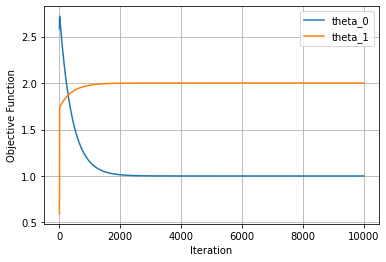

In [19]:
plt.plot(col_theta0)
plt.plot(col_theta1)
plt.ylabel('Objective Function')
plt.xlabel('Iteration')
plt.legend(['theta_0','theta_1'])
plt.grid()
plt.show()
